# Probability Density Function

<h3>Continues Variable</h3>
<ul>
    <li>Definition</li>
    <li> Qunatity that take any value </li>
</ul>
Example:
<li>Michelson Speed of Light</li>

<h3>Probability density function (PDF)</h3>
<ul>
    <li> Continous analog to the PMF </li>
    <li> Mathematical description of the relative likelihood of observing a value of continous variable </li>
</ul>

related topic

<h3> Comulative Distribution Function (CDF) </h3>

<h3>Probability Mass Function (PMF)</h3>


<h3> Exercise </h3>
<h4>interpreting PDFs</h4><br>

Consider the PDF shown to the right (it may take a second to load!). Which of the following is true?
<h3> Instructions </h3><br>
<h4>Possible Answers</h4>
<ul>
    <li>is more likely to be less than 10 than to be greater than 10.</li>
    <li>is more likely to be greater than 10 than to be less than 10.</li>
    <li>We cannot tell from the PDF if  is more likely to be greater than or less than 10.</li>
    <li>This is not a valid PDF because it has two peaks.</li>
</ul>

<h4>Correct! The probability is given by the area under the PDF, and there is more area to the left of 10 than to the right</h4>

<h3>Summary For Probability Distribution Functions (PMF, PDF, CDF)</h3>

<h4>The Terminology of Probability Distribution</h4>
<img src="../images/TeminologiPDF.png" />

<h4> The Teminology of PMF</h4>
<img src="../images/PMF.png" />

<h4> Cummulative Probability </h4>
<h4>The cumulative Probability at The end must be 1</h4>
<img src="../images/CDF.png" />

### Interpreting CDFs

<h3>Exercise</h3>

<h4>Interpreting CDFs</h4>
At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x is greater than 10?

<h3>Instructions</h3>

<h4>Possible Answer</h4>
<ul>
    <li>0.25</li>
    <li>0.75</li>
    <li>3.75</li>
    <li>15</li>
</ul>

<h4>Answer</h4>

Correct! The value of the CDF at x = 10 is 0.75, so the probability that x < 10 is 0.75. Thus, the probability that x > 10 is 0.25.



# Introduction to normal Distribution

<li>Describes a continous variable whose PDF has single simetric peak</li>
<li>mean of Normal distribution ≠ mean computed from data</li>
<li>standard deviation of a Normal distribution ≠ standard deviation computed from data</li>



<h3>Comparing Data to Normal DIstribution</h3>

<h4>Why we need to compare normal distribution</h4>

<h4>What should we see as standard for comparing normal distribution</h4>
the standard to comparing normal distribution is:
<ul>
    <li>Center of distribution</li>
    <li>Spread of distribution</li>
</ul>    

Reference:
<ul>
<li>https://www.khanacademy.org/math/ap-statistics/quantitative-data-ap/describing-comparing-distributions/v/comparing-distributions</li>
</ul>

## Checking Normality of Michelson Data

In [16]:
from pathlib import Path

data = Path('../data/')
michelson_speed_of_light = data / 'michelson_speed_of_light.csv'

In [17]:
import pandas as pd


df = pd.read_csv(michelson_speed_of_light)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.columns = df.columns.str.strip()
df.head(2)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


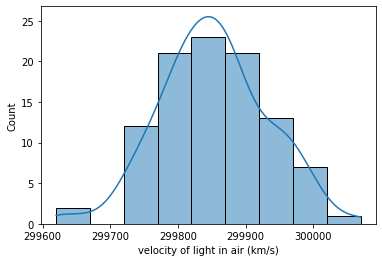

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['velocity of light in air (km/s)'], bins=9, kde=True)
plt.show()

### Import ecdf from module 1

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


### Checking Normality of Michelson Data Code Example

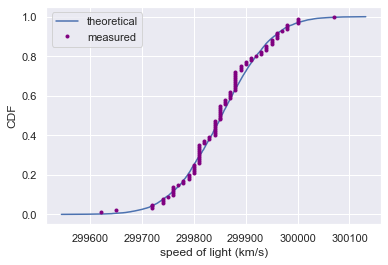

In [17]:
mean = np.mean(df['velocity of light in air (km/s)'])
std = np.std(df['velocity of light in air (km/s)'])

samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['velocity of light in air (km/s)'])
x_theor, y_theor = ecdf(samples)

sns.set()
plt.plot(x_theor, y_theor, label='theoretical')
plt.plot(x, y, marker='.', linestyle='none', label='measured', color='purple')
plt.legend()
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()


<h3>Execise</h3>

<h4>The Normal PDF</h4>

<p>In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.
</p>

<h3>Instruction</h3>

<ul>
<li>Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively. </li>
<li>Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.</li>
<li>Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.</li>
</ul>


In [18]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

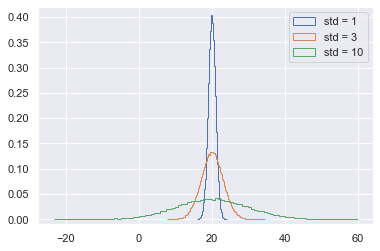

In [26]:
# Make histograms
# plt.figure(figsize=(7, 7))
# for data in [samples_std1, samples_std3, samples_std10]:
#     plt.hist(data, density=True, bins=100, histtype='step')
    
    
# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

    
# Make a legend, set limits and show plot
plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

<h3>Exercise</h3>

<h2>The Normal CDF</h2>
Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

<h3>Instructions</h3>

<ul>
<li>Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.</li>
    <li>Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).</li>
<li>Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.</li>
</ul>

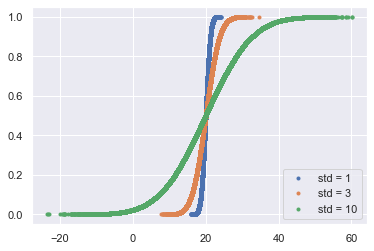

In [27]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)


# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')



# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


<h2>The Normal distribution: Properties and warnings</h2>

<h3>The Gausian Distribution</h3>


<h4>What is Gausian Distribution?</h4>

A distribution is simply a collection of value and frequency of a given observation, like age of a population.
Samples of a ideal Gaussian distribution (aka normal distribution or bell curve) follow bell curve distribution meaning values are more likely around mean over extremes. Figure below shows 10k floating values generated with Gaussian distribution.

<img src="../images/gausianDistribution.png" />

In mathematics, a Gaussian function, often simply referred to as a Gaussian, is a function of the form

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/13993a37c117176295fada7cdaa9c1ef1ae769f7" />
for arbitrary real constants a, b and non zero c. It is named after the mathematician Carl Friedrich Gauss. 

<h4>Why is Gaussian Distribution Important?</h4>
<ol>
<li>Gaussian distribution is ubiquitous because a dataset with finite variance turns into Gaussian as long as dataset with independent feature-probabilities is allowed to grow in size. Gaussian distribution is the most important probability distribution in statistics because it fits many natural phenomena like age, height, test-scores, IQ scores, sum of the rolls of two dices and so on.</li>
<li>Datasets with Gaussian distributions makes applicable to a variety of methods that fall under parametric statistics. The methods such as propagation of uncertainty and least squares parameter fitting that make a data-scientist life easy are applicable only to datasets with normal or normal-like distributions.</li>
<li>Conclusions and summaries derived from such analysis are intuitive and easy to explain to audiences with basic knowledge of statistics.</li>
</ol>
<h4>How we use Gausian Distribution</h4>

<b>An Example of How to Transform any Distribution to a Gaussian-like Distribution.</b>

<p>It is possible to transform any distribution to a Gaussian-like distribution using an appropriate transform. The picture below shows a dataset with sample frequencies multiplied by power of 2, so the distribution becomes skewed to the left with a long tail on the right.</p>
<img src="../images/non-gaussian.png" />

<p>We can come up with an appropriate reverse-transform to make this dataset Gaussian. With the knowledge that sample frequencies were multiplied by a power of 2, we can use reverse-transform as logarithm of 2 to change the distribution. Picture below shows the distribution after applying log2(x) transformation.
</p>

<img src="../images/gausianDistribution.png" />

<h4>Reference</h4>
<ul>
    <li>https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac</li>
</ul>

<h3>Gauss and the 10 Deutschmark banknote</h3>
What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote, shown to the right?

<h3>Answers</h3>

mean=3, std=1

<h4>Exercise</h4>

<p>Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.
</p>

<h4>Instructions</h4>

<ol>
<li>Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.</li>
<li>Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().</li>
<li>Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.</li>
<li>Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.</li>
</ol>

In [9]:
belmont_no_outliers = [148.51, 146.65, 148.52, 150.7,  150.42, 150.88, 151.57, 147.54, 149.65, 148.74,
 147.86, 148.75, 147.5,  148.26, 149.71, 146.56, 151.19, 147.88, 149.16, 148.82,
 148.96, 152.02, 146.82, 149.97, 146.13, 148.1,  147.2,  146. ,  146.4,  148.2,
 149.8,  147.,   147.2,  147.8,  148.2,  149. ,  149.8,  148.6,  146.8,  149.6,
 149.,   148.2,  149.2,  148.,   150.4,  148.8,  147.2,  148.8,  149.6,  148.4,
 148.4,  150.2,  148.8,  149.2,  149.2,  148.4,  150.2,  146.6,  149.8,  149.,
 150.8,  148.6,  150.2,  149.,   148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
 152.2,  148.2,  149.2,  151.,   149.6,  149.6,  149.4,  148.6,  150. ,  150.6,
 149.2,  152.6,  152.8,  149.6,  151.6,  152.8,  153.2,  152.4,  152.2 ]


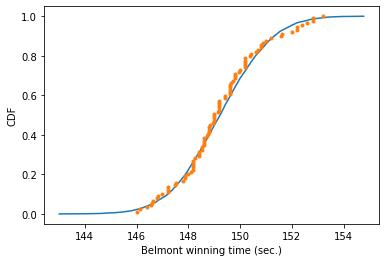

In [19]:
import numpy as np
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


<h3> Conclusion </h3>
<p>The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race</p>

<h3>Exercise</h3>

<p>What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?</p>

<h3>Instructions</h3>

<ul>
<li>Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.</li>
<li>Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.</li>
<li>Print the result.</li>
</ul>


In [20]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum((samples <= 144) / len(samples))

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.0006130000000000002


<h4>Solution</h4>
Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.



# The Exponantial Distribution

example:
<ul>
    <li>Just as there are many named discrete distributions, there are many named continuous distributions.</li>
    <li>For example, at the bus stop in Poissonville, we know the number of buses arriving per hour, are Poisson distributed.</li>
    <ul>
        <li>The waiting time between arrival of poisson process is Exponentially distributed</li>
    </ul>
</ul>


<img src="https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/exponential_pdf.JPG" />
<br>
<h3>Possible poisson proccess</h3>
<ul>
    <li>Nuclear Incident</li>
    <ul>
        <li>Timing of one is independent of others</li>
    </ul>
    <li>We can compute and plot the CDF we would expect based on the mean time between incidents and overlay that with the ECDF from the real data</li>
    <li>Take the usual approach where we draw many samples out of the Exponential distribution, using the mean inter-incident time as the parameter</li>
</ul>

<code>
    mean = np.mean(inter_times)
    samples = np.random.exponential(mean, size=10000)
    x, y = ecdf(inter_times)
    x_theor, y_theor = ecdf(samples)
    _ = plt.plot(x_theor, y_theor)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.xlabel('time (days)')
    _ = plt.ylabel('CDF')
    plt.show()
</code>


<img src="https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2019-07-10_statistical_thinking_1/exponential_inter-incident_times.JPG" />

<ul>
    <li>It's close to being Exponentially distributed, indicating nuclear incidents can be modeled as a Poisson process.<li>
    <li>The Exponential and Normal are just two of many examples of continuous distributions.</li>
    <li>In many cases, just simulated the story to get the CDF.</li>
    <ul>
        <li>If you can simulate a story, you can get the distribution.</li>
    </ul>
</ul>

<h4>Exercise</h4>

<h2>Matching a story and a distribution</h2>
How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.


<h4>Possible Answer</h4>
<ul>
    <li><del>Normal</del></li>
<li>Exponential</li>
<li><del>Poisson</del></li>
<li><del>Uniform</del></li>
</ul>

<h2>Waiting for the next Secretariat</h2>
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

<h4>Possible Answer</h4>
<ul>
    <li>Normal, because the distribution of Belmont winning times are Normally distributed.</li>
    <li>Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.</li>
    <li>Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.</li>
    <li>Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.</li>
</ul>

<h4>Clue</h4>
Incorrect<br>
Incorrect. Do not think of the shape of the distribution, think of the story behind it and try to match the story of waiting for Secretariat with a story of a named distribution.

Incorrect<br>
Incorrect. Just because there is a most-expected waiting time does not mean there is a peak. Remember, zero is the most probable value to draw out of an Exponential distribution, but it has no peak.

Incorrect<br>
Incorrect. Yes, the Belmont winning times are Normally distributed, but does the time between the extreme event of an ultra-fast horse match the story of the Normal distribution?


<h4>Exercise</h4>

<h2>If you have a story, you can simulate it!</h2><br>
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle, when a batter gets all four kinds of hits in a single game, is another rare baseball event. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes in succession? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.


<h4>Instructions</h4>
<ul>
    <li>Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.</li>
    <ul>
        <li>Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.</li>
    <li>Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.</li>
    <li>The function returns the sum of the waiting times for the two events.</li>
    </ul>

</ul>



In [22]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

<h4>Exercise</h4>

<h2>Distribution of no-hitters and cycles</h2><br>
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

<h4>Instructions</h4>

<ul>
    <li>Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.</li>
    <li>Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.</li>
    <li>Label the axes.</li>
    <li>Show your plot.</li>
</ul>


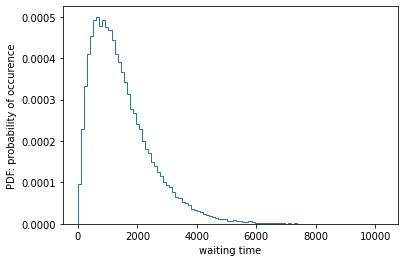

In [23]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715,  100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel('waiting time')
plt.ylabel('PDF: probability of occurence')

# Show the plot
plt.show()


<h4>Solution</h4>
<b>Great work! Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF</b>

<h2>Final thoughts and encouragement toward Statistical Thinking II</h2>
<h3>You can now</h3>

<ul>
    <li>Construct instructive plots</li>
    <li>Computer informative summary statistics</li>
    <li>Use "hacker" statistics</li>
    <li>Think probabilistically</li>
    <li>The knowledge learned in this course really shines when directly applied to statistical inference problems.</li>
</ul>

<h3>In Squel you will</h3>
<ul>
    <li>Estimate Parameter values</li>
    <li>Perform linear regression</li>
    <li>Compute convidence intervals</li>
    <li>Perform hypothesis test</li>
</ul>